In [131]:
#Imports
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from collections import defaultdict, Counter

In [132]:
#Import Data
X = pd.read_csv("X.csv")
y = pd.read_csv("y.csv")
y_class = (np.sign(y) > 0).astype(int)
print(np.sum(np.array(y_class)))
print(len(y_class))

45
90


Best k for KNN classification (based on out-of-sample accuracy): 21


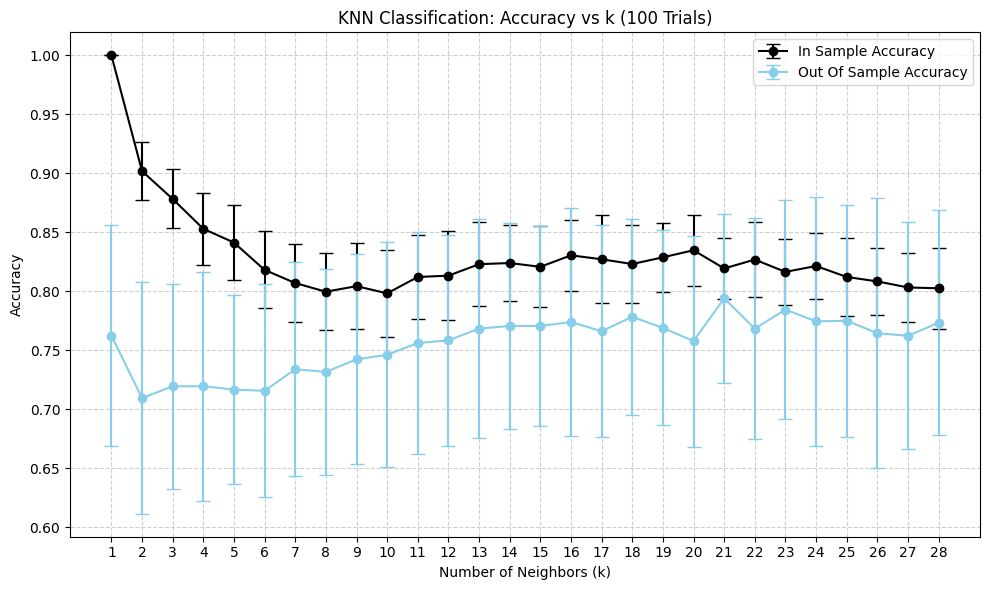

In [133]:
#Model 1: KNN
#maybe throw in appendix

k_values = range(1, 29)

in_sample_acc_means, out_sample_acc_means = [], []
in_sample_acc_stds, out_sample_acc_stds = [], []

for k in k_values:
    in_acc, out_acc = [], []

    for _ in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, np.array(y_class).ravel(), test_size=0.2)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_scaled, y_train)

        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        in_acc.append(accuracy_score(y_train, y_train_pred))
        out_acc.append(accuracy_score(y_test, y_test_pred))

    in_sample_acc_means.append(np.mean(in_acc))
    out_sample_acc_means.append(np.mean(out_acc))
    in_sample_acc_stds.append(np.std(in_acc))
    out_sample_acc_stds.append(np.std(out_acc))

best_index = np.argmax(out_sample_acc_means)
best_k = k_values[best_index]
print(f"Best k for KNN classification (based on out-of-sample accuracy): {best_k}")

plt.figure(figsize=(10, 6))
plt.errorbar(k_values, in_sample_acc_means, yerr=in_sample_acc_stds,
             fmt='-o', capsize=5, label="In Sample Accuracy", color='k')
plt.errorbar(k_values, out_sample_acc_means, yerr=out_sample_acc_stds,
             fmt='-o', capsize=5, label="Out Of Sample Accuracy", color='skyblue')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Classification: Accuracy vs k (100 Trials)")
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Best tree depth for Decision Tree (based on out-of-sample accuracy): 1


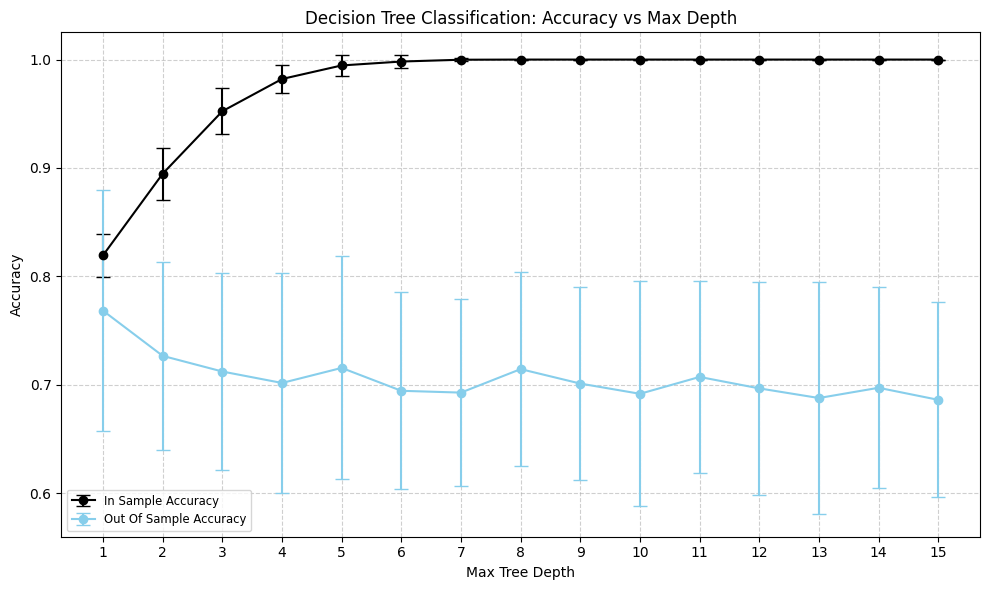

In [134]:
#Model 2: Decision Tree

max_depths = range(1, 16)

in_sample_acc_means, out_sample_acc_means = [], []
in_sample_acc_stds, out_sample_acc_stds = [], []

for depth in max_depths:
    in_acc, out_acc = [], []

    for _ in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, np.array(y_class).ravel(), test_size=0.2)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = DecisionTreeClassifier(max_depth=depth)
        model.fit(X_train_scaled, y_train)

        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        in_acc.append(accuracy_score(y_train, y_train_pred))
        out_acc.append(accuracy_score(y_test, y_test_pred))

    in_sample_acc_means.append(np.mean(in_acc))
    out_sample_acc_means.append(np.mean(out_acc))
    in_sample_acc_stds.append(np.std(in_acc))
    out_sample_acc_stds.append(np.std(out_acc))

best_index = np.argmax(out_sample_acc_means)
best_depth = max_depths[best_index]
print(f"Best tree depth for Decision Tree (based on out-of-sample accuracy): {best_depth}")

plt.figure(figsize=(10, 6))
plt.errorbar(max_depths, in_sample_acc_means, yerr=in_sample_acc_stds,
             fmt='-o', capsize=5, label="In Sample Accuracy", color='k')
plt.errorbar(max_depths, out_sample_acc_means, yerr=out_sample_acc_stds,
             fmt='-o', capsize=5, label="Out Of Sample Accuracy", color='skyblue')
plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Classification: Accuracy vs Max Depth")
plt.xticks(max_depths)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize='small')
plt.tight_layout()
plt.show()


Best max depth for Random Forest (based on out-of-sample accuracy): 2


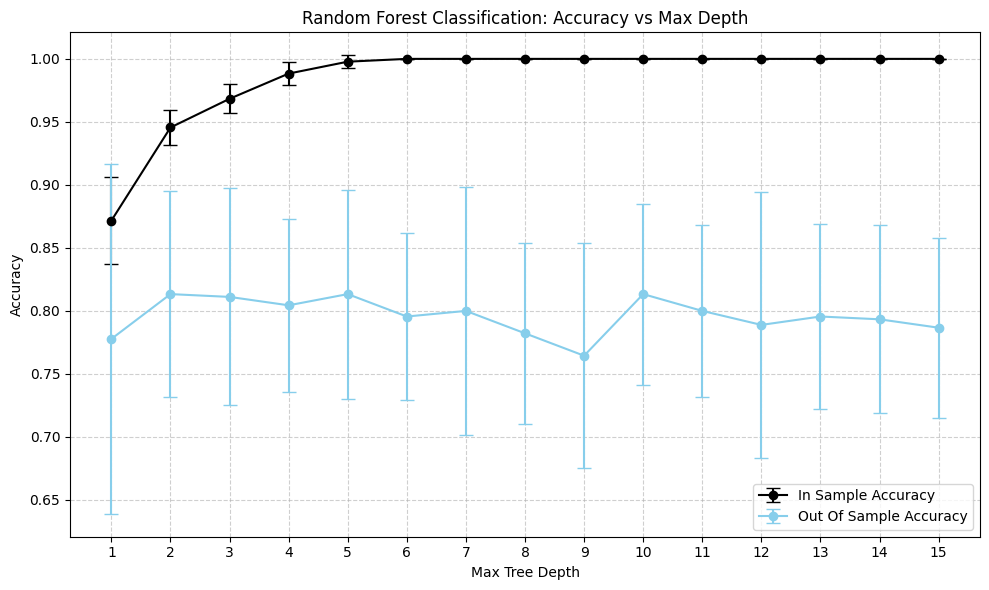

In [135]:
#Model 3: Random Forest

max_depths = range(1, 16)

in_sample_acc_means, out_sample_acc_means = [], []
in_sample_acc_stds, out_sample_acc_stds = [], []

for depth in max_depths:
    in_acc, out_acc = [], []

    for _ in range(25):
        X_train, X_test, y_train, y_test = train_test_split(X, np.array(y_class).ravel(), test_size=0.2)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=None)
        model.fit(X_train_scaled, y_train)

        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        in_acc.append(accuracy_score(y_train, y_train_pred))
        out_acc.append(accuracy_score(y_test, y_test_pred))

    in_sample_acc_means.append(np.mean(in_acc))
    out_sample_acc_means.append(np.mean(out_acc))
    in_sample_acc_stds.append(np.std(in_acc))
    out_sample_acc_stds.append(np.std(out_acc))

best_index = np.argmax(out_sample_acc_means)
best_depth = max_depths[best_index]
print(f"Best max depth for Random Forest (based on out-of-sample accuracy): {best_depth}")

plt.figure(figsize=(10, 6))
plt.errorbar(max_depths, in_sample_acc_means, yerr=in_sample_acc_stds,
             fmt='-o', capsize=5, label="In Sample Accuracy", color='k')
plt.errorbar(max_depths, out_sample_acc_means, yerr=out_sample_acc_stds,
             fmt='-o', capsize=5, label="Out Of Sample Accuracy", color='skyblue')
plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy")
plt.title("Random Forest Classification: Accuracy vs Max Depth")
plt.xticks(max_depths)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Best C for Logistic Regression (based on out-of-sample accuracy): 0.0052


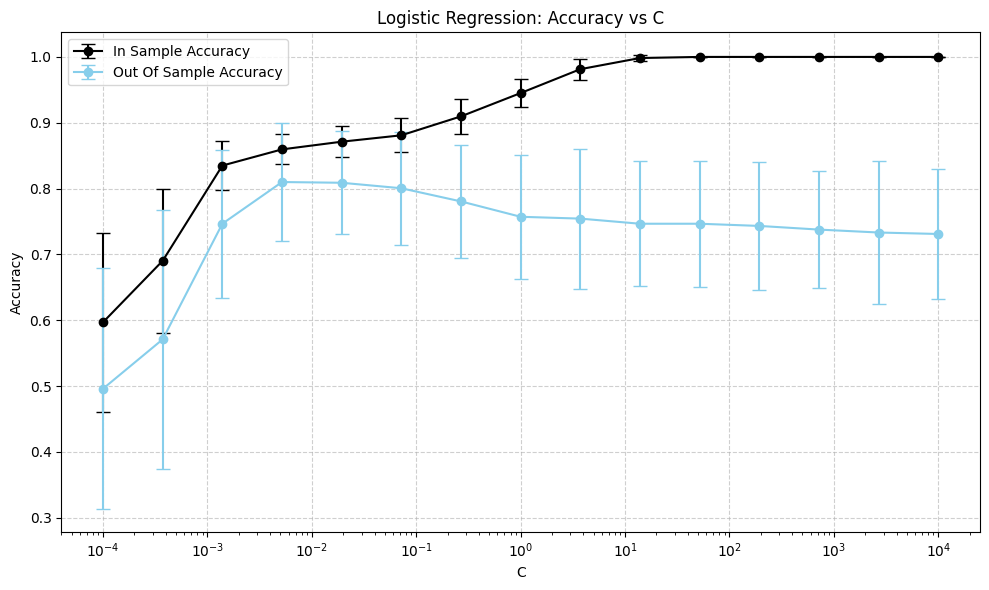

In [136]:
#Model 4: Logistic Regression

C_values = np.logspace(-4, 4, 15)

in_sample_acc_means, out_sample_acc_means = [], []
in_sample_acc_stds, out_sample_acc_stds = [], []

for C in C_values:
    in_acc, out_acc = [], []

    for _ in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, np.array(y_class).ravel(), test_size=0.2)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = LogisticRegression(C=C, max_iter=1000)
        model.fit(X_train_scaled, y_train)

        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        in_acc.append(accuracy_score(y_train, y_train_pred))
        out_acc.append(accuracy_score(y_test, y_test_pred))

    in_sample_acc_means.append(np.mean(in_acc))
    out_sample_acc_means.append(np.mean(out_acc))
    in_sample_acc_stds.append(np.std(in_acc))
    out_sample_acc_stds.append(np.std(out_acc))

best_index = np.argmax(out_sample_acc_means)
best_C = C_values[best_index]
print(f"Best C for Logistic Regression (based on out-of-sample accuracy): {best_C:.4f}")

plt.figure(figsize=(10, 6))
plt.errorbar(C_values, in_sample_acc_means, yerr=in_sample_acc_stds,
             fmt='-o', capsize=5, label="In Sample Accuracy", color='k')
plt.errorbar(C_values, out_sample_acc_means, yerr=out_sample_acc_stds,
             fmt='-o', capsize=5, label="Out Of Sample Accuracy", color='skyblue')
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Logistic Regression: Accuracy vs C")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [137]:
#Extraction 1: Decision Tree
#using built in feature importance

X_mat = X.to_numpy()

y_mat = y_class.to_numpy()

loo = LeaveOneOut()

tree = DecisionTreeClassifier(max_depth=2)

feature_importances = {col: [] for col in X.columns}

for train_idx, test_idx in loo.split(X_mat):
    X_train, X_test = X_mat[train_idx], X_mat[test_idx]
    y_train, y_test = y_mat[train_idx], y_mat[test_idx]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    X_test_scaled = scaler.transform(X_test)

    tree.fit(X_train_scaled, y_train)

    importances = tree.feature_importances_

    for feature_idx, importance in enumerate(importances):
        feature_name = X.columns[feature_idx]
        feature_importances[feature_name].append(importance)

average_importances = {feature: np.mean(importances) for feature, importances in feature_importances.items()}

sorted_features_by_importance = sorted(average_importances.items(), key=lambda x: x[1], reverse=True)

top_3_features = sorted_features_by_importance[:3]

results_df = pd.DataFrame({
    'Feature': [feature for feature, _ in top_3_features],
    'Average Importance': [average_importances[feature] for feature, _ in top_3_features]
})

print(results_df.to_string(index=False))

Feature  Average Importance
   OPS+            0.669134
 p_WHIP            0.166994
    OBP            0.129863


In [138]:
#Extraction 2: Random Forest
#using built in feature importance

X_mat = X.to_numpy()

y_mat = (y_class.to_numpy()).ravel()

loo = LeaveOneOut()

rf = RandomForestClassifier(max_depth=2)

feature_importances = {col: [] for col in X.columns}

for train_idx, test_idx in loo.split(X_mat):
    X_train, X_test = X_mat[train_idx], X_mat[test_idx]
    y_train, y_test = y_mat[train_idx], y_mat[test_idx]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    X_test_scaled = scaler.transform(X_test)

    rf.fit(X_train_scaled, y_train)

    importances = rf.feature_importances_

    for feature_idx, importance in enumerate(importances):
        feature_name = X.columns[feature_idx]
        feature_importances[feature_name].append(importance)

average_importances = {feature: np.mean(importances) for feature, importances in feature_importances.items()}

sorted_features_by_importance = sorted(average_importances.items(), key=lambda x: x[1], reverse=True)

top_3_features = sorted_features_by_importance[:3]

results_df = pd.DataFrame({
    'Feature': [feature for feature, _ in top_3_features],
    'Average Importance': [average_importances[feature] for feature, _ in top_3_features]
})

print(results_df.to_string(index=False))

Feature  Average Importance
   OPS+            0.129887
 p_SO/W            0.074380
     AB            0.061739


In [139]:
#Extraction 3: Logistic Regression
#coefficient ranking, same as other regressions

X_mat = X.to_numpy()

y_mat = (y_class.to_numpy()).ravel()

loo = LeaveOneOut()

log_reg = LogisticRegression(C = 0.001)

feature_coeffs = {col: [] for col in X.columns}
feature_ranks = {col: [] for col in X.columns}

for train_idx, test_idx in loo.split(X_mat):
    X_train, X_test = X_mat[train_idx], X_mat[test_idx]
    y_train, y_test = y_mat[train_idx], y_mat[test_idx]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    X_test_scaled = scaler.transform(X_test)

    log_reg.fit(X_train_scaled, y_train)

    coeffs = log_reg.coef_[0]

    ranked_features = sorted(zip(X.columns, coeffs), key=lambda x: abs(x[1]), reverse=True)
    
    for rank, (feature_name, coef) in enumerate(ranked_features):
        feature_coeffs[feature_name].append(coef)
        feature_ranks[feature_name].append(rank + 1)

average_ranks = {feature: np.mean(ranks) for feature, ranks in feature_ranks.items()}
average_coeffs = {feature: np.mean(coeffs) for feature, coeffs in feature_coeffs.items()}

sorted_features_by_rank = sorted(average_ranks.items(), key=lambda x: x[1])

top_3_features = sorted_features_by_rank[:3]

results_df = pd.DataFrame({
    'Feature': [feature for feature, _ in top_3_features],
    'Average Rank': [average_ranks[feature] for feature, _ in top_3_features],
    'Average Coefficient': [average_coeffs[feature] for feature, _ in top_3_features]
})

print(results_df.to_string(index=False))

Feature  Average Rank  Average Coefficient
   OPS+      1.000000             0.023419
     BA      2.000000             0.020143
      H      3.066667             0.019630
